# Dimensionality Reduction: Mental Health in Tech 2016

## 1. Load Data & Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/processed/mental_health_preprocessed.csv')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## 2. PCA (Principal Component Analysis)

In [2]:
from sklearn.decomposition import PCA

# Full PCA to analyze variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Explained variance
exp_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

# Find components needed for 80% and 95% variance
n_80 = np.argmax(cum_var >= 0.80) + 1
n_95 = np.argmax(cum_var >= 0.95) + 1

print(f"Components for 80% variance: {n_80}")
print(f"Components for 95% variance: {n_95}")

Components for 80% variance: 49
Components for 95% variance: 80


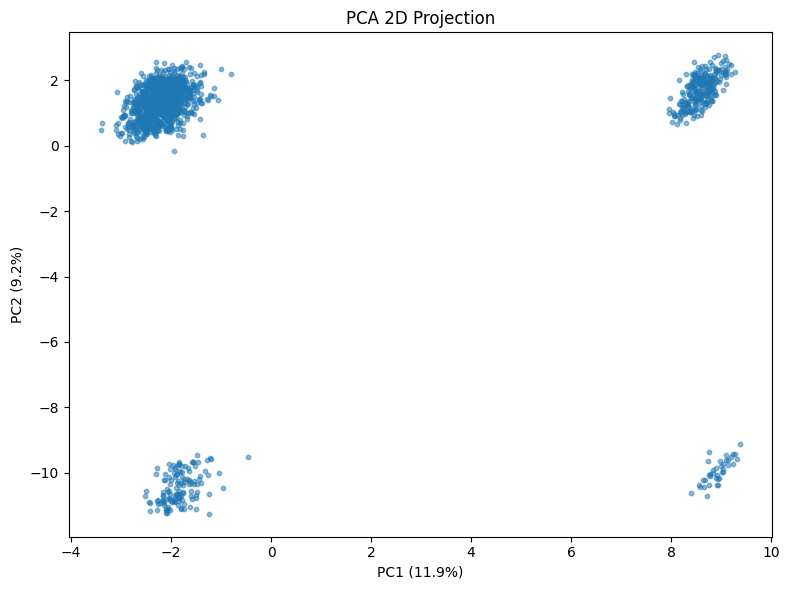

In [3]:
# 2D projection for visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
ax.set_title('PCA 2D Projection')
plt.tight_layout()
plt.show()

## 3. MDS (Multidimensional Scaling)

c:\Users\Sven-\OneDrive\Desktop\ML-UL-FE\venv\Lib\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


MDS Normalized Stress: 0.3867


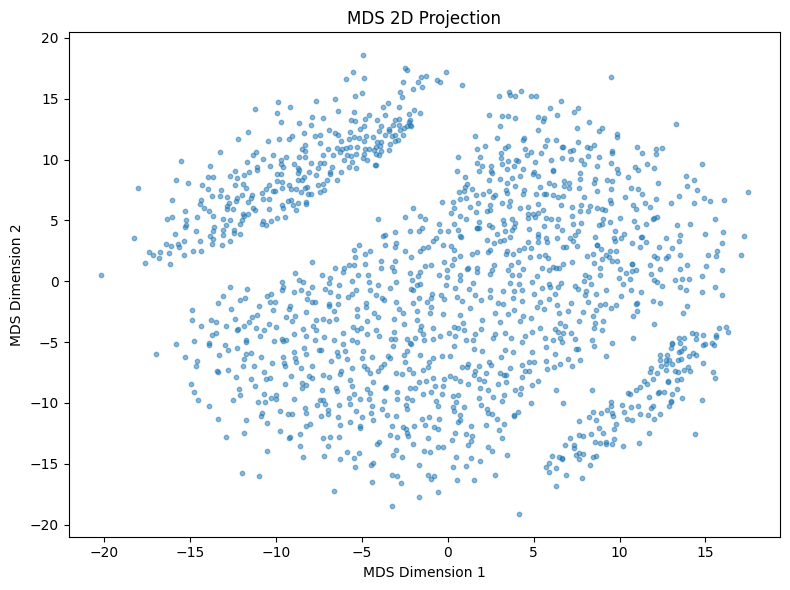

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42, n_jobs=-1, n_init=4, normalized_stress=True)
X_mds = mds.fit_transform(X_scaled)

print(f"MDS Normalized Stress: {mds.stress_:.4f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.5, s=10)
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_title('MDS 2D Projection')
plt.tight_layout()
plt.show()

## 4. LLE (Locally Linear Embedding)

LLE Reconstruction Error: 0.000000


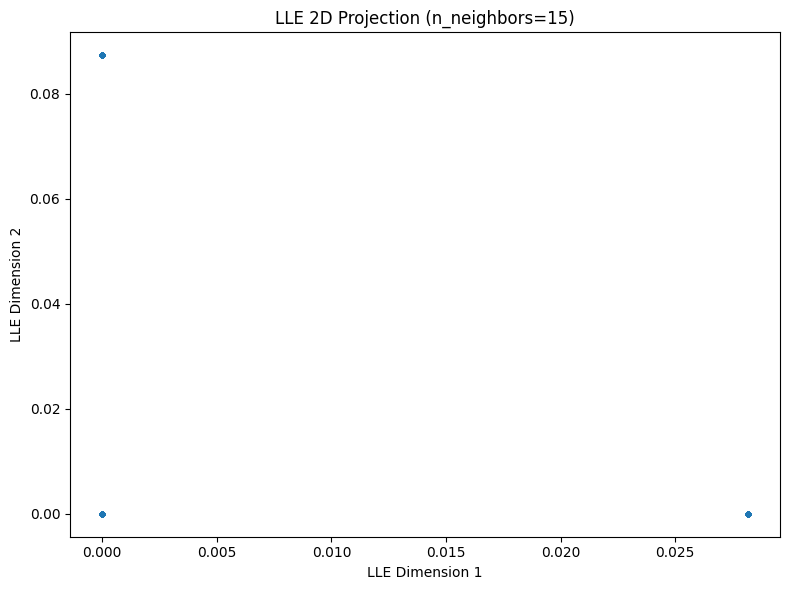

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=15, random_state=42, n_jobs=-1)
X_lle = lle.fit_transform(X_scaled)

print(f"LLE Reconstruction Error: {lle.reconstruction_error_:.6f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_lle[:, 0], X_lle[:, 1], alpha=0.5, s=10)
ax.set_xlabel('LLE Dimension 1')
ax.set_ylabel('LLE Dimension 2')
ax.set_title('LLE 2D Projection (n_neighbors=15)')
plt.tight_layout()
plt.show()

## 5. t-SNE

t-SNE KL Divergence: 1.5335


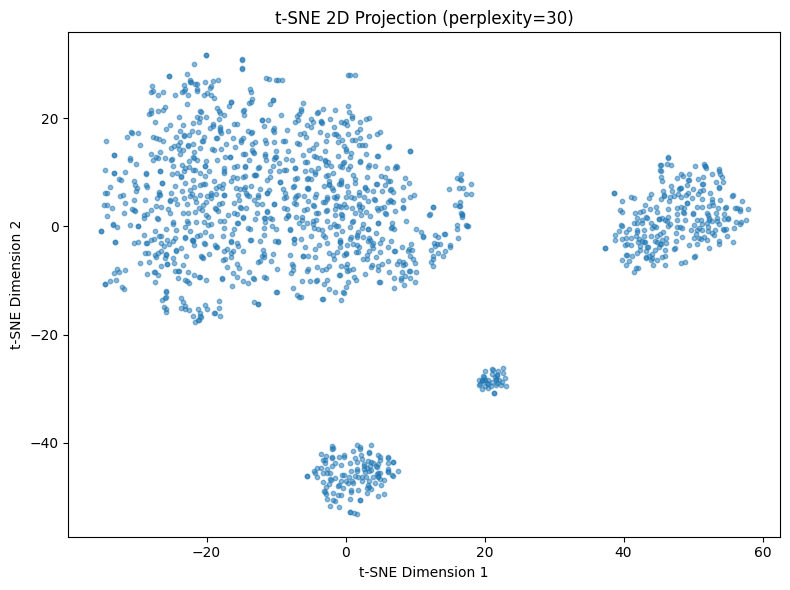

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

print(f"t-SNE KL Divergence: {tsne.kl_divergence_:.4f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, s=10)
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('t-SNE 2D Projection (perplexity=30)')
plt.tight_layout()
plt.show()

## 6. UMAP

c:\Users\Sven-\OneDrive\Desktop\ML-UL-FE\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


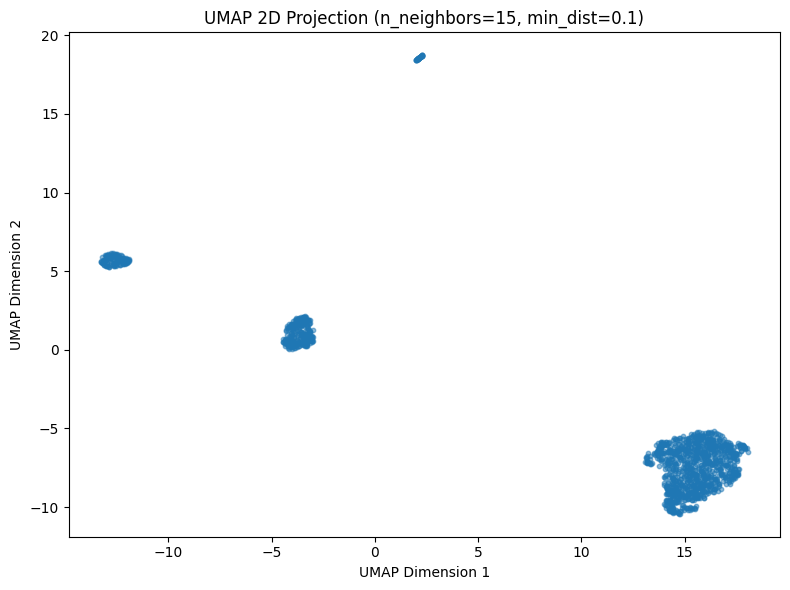

In [ ]:
import umap

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5, s=10)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_title('UMAP 2D Projection (n_neighbors=15, min_dist=0.1)')
plt.tight_layout()
plt.show()

## 7. Comparison

## 8. Save Reduced Data